In [12]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence, text
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional
import tensorflow as tf

In [13]:
from keras.datasets import imdb

num_words = 10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=num_words)

In [14]:
#convert the text data to numerical form 
#make the lengths of the texts equal by padding. If a sentence is having a length greater than 200 
#it will be trimmed off otherwise it will be padded by 0.

max_len =200
x_train= sequence.pad_sequences(x_train, maxlen=max_len)
x_test=sequence.pad_sequences(x_test, maxlen=max_len)
y_test=np.array(y_test)
y_train=np.array(y_train) 


In [15]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=128
model=Sequential()
model.add(Embedding(num_words, embedding_size,input_length=max_len))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1330465 (5.08 MB)
Trainable params: 1330

In [16]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [17]:
batch_size=64
epochs=4

model_RNN=model.fit(x_train,y_train,
          validation_split=0.3,
          batch_size=batch_size,
          epochs=epochs
          )

Epoch 1/4


2024-10-18 23:49:24.656848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-18 23:49:24.882661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/274 [..............................] - ETA: 5:49 - loss: 0.6936 - accuracy: 0.5000

2024-10-18 23:49:25.140495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


274/274 [==============================] - ETA: 0s - loss: 0.4836 - accuracy: 0.7591

2024-10-18 23:49:37.715415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-18 23:49:37.795277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


274/274 [==============================] - 15s 52ms/step - loss: 0.4836 - accuracy: 0.7591 - val_loss: 0.3378 - val_accuracy: 0.8572
Epoch 2/4
274/274 [==============================] - 12s 45ms/step - loss: 0.2435 - accuracy: 0.9065 - val_loss: 0.3187 - val_accuracy: 0.8627
Epoch 3/4
274/274 [==============================] - 11s 41ms/step - loss: 0.1671 - accuracy: 0.9398 - val_loss: 0.3378 - val_accuracy: 0.8709
Epoch 4/4
274/274 [==============================] - 12s 43ms/step - loss: 0.1353 - accuracy: 0.9521 - val_loss: 0.4174 - val_accuracy: 0.8459


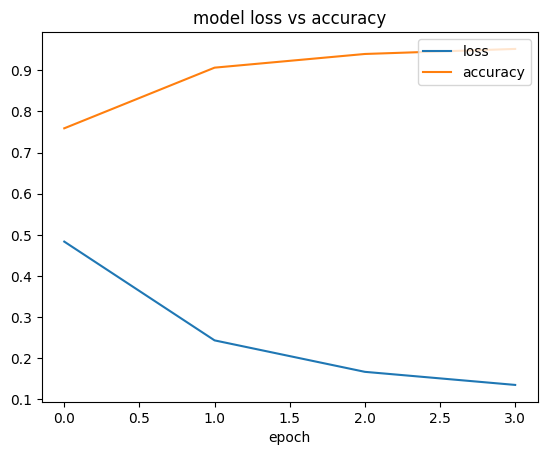

In [18]:
from matplotlib import pyplot

pyplot.plot(model_RNN.history['loss'])
pyplot.plot(model_RNN.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

In [19]:
loss, acc = model.evaluate(x_test,y_test)
print(f'Test loss: {loss},Test accuracy= {acc}')

782/782 [==============================] - 10s 13ms/step - loss: 0.4324 - accuracy: 0.8423
Test loss: 0.43235448002815247,Test accuracy= 0.8423200249671936


In [20]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

# Load the IMDb dataset
word_index = imdb.get_word_index()  # Get the word index mapping

# Reverse the word index mapping: key -> words, index -> value
reverse_word_index = {index: word for word, index in word_index.items()}

# Decode a sequence of indices to text
def decode_sequence(sequence):
    decoded_words = [reverse_word_index.get(index-3, '') for index in sequence]
    return ' '.join(decoded_words)

# Example usage
review_indices = x_test[2]
review_text = decode_sequence(review_indices)

print("Review Text:", review_text)

Review Text: everyone's horror the  promptly eats the mayor and then goes on a merry rampage  citizens at random a title card  reads news of the king's  throughout the kingdom when the now terrified  once more   for help he loses his temper and  their community with lightning  the moral of our story delivered by a hapless frog just before he is eaten is let well enough alone br br considering the time period when this startling little film was made and considering the fact that it was made by a russian  at the height of that  country's civil war it would be easy to see this as a  about those events  may or may not have had  turmoil in mind when he made  but whatever  his choice of material the film stands as a  tale of universal   could be the soviet union italy germany or japan in the 1930s or any country of any era that lets its guard down and is overwhelmed by  it's a fascinating film even a charming one in its macabre way but its message is no joke


In [21]:
prediction = model.predict(x_test)
print("Prediction:", prediction[2])
if prediction[2] > 0.5: # Threshold
    sentiment = "Positive"
else:
    sentiment = "Negative"
print("Sentiment:", sentiment)

  7/782 [..............................] - ETA: 7s  

2024-10-18 23:50:25.478299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-18 23:50:25.535072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 8s 10ms/step
Prediction: [0.2895967]
Sentiment: Negative
